In [1]:
%matplotlib inline

import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import sys
import matplotlib
sns.set_context('poster')

Assumes that the following rsync has happened:

`rsync -av orchids-compute:/data1/urebbapr/MLOC/notebooks/weather.scores.h5 .`

In [2]:
F_H5 = 'weather.scores.h5'
df_te = pd.read_hdf(F_H5, '/scores/temperature/tsfresh/fullfeat')
df_rh = pd.read_hdf(F_H5, '/scores/relative_humidity/tsfresh/fullfeat')
df_ws = pd.read_hdf(F_H5, '/scores/wind_speed/tsfresh/fullfeat')
df_ps = pd.read_hdf(F_H5, '/scores/pressure/tsfresh/fullfeat')

I'm adding in the re-run here to see whether the results differ by much

In [3]:
F_H5_RERUN = 'weather.scores.rerun4midyear.h5.h5'
df_te_rerun = pd.read_hdf(F_H5, '/scores/temperature/tsfresh/fullfeat')


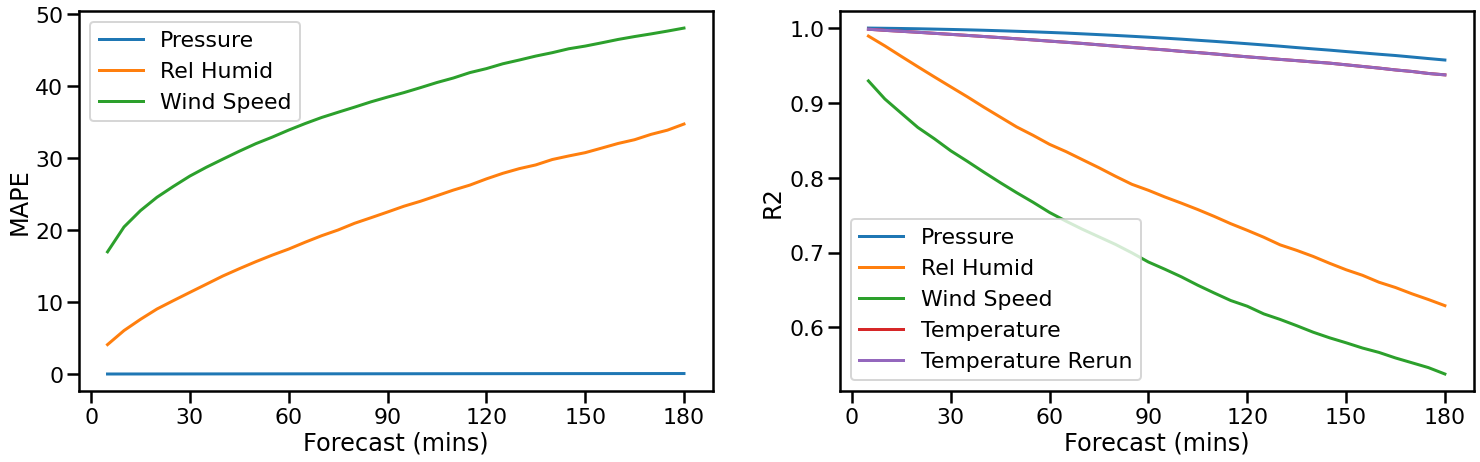

In [4]:
matplotlib.rcParams.update({'font.size': 24})

fig, ax = plt.subplots(1, 2, figsize=(25, 7))

ax[0].plot(df_ps.index, df_ps.MAPE*100, label='Pressure')
ax[0].plot(df_rh.index, df_rh.MAPE*100, label='Rel Humid')
ax[0].plot(df_ws.index, df_ws.MAPE*100, label='Wind Speed')
# ax[0].plot(df_te.index, df_te.MAPE*100, label='Temperature')
ax[0].set_ylabel('MAPE')
ax[0].set_xlabel('Forecast (mins)')
ax[0].set_xticks(range(0, 210, 30))
ax[0].legend()

ax[1].plot(df_ps.index, df_ps.R2, label='Pressure')
ax[1].plot(df_rh.index, df_rh.R2, label='Rel Humid')
ax[1].plot(df_ws.index, df_ws.R2, label='Wind Speed')
ax[1].plot(df_te.index, df_te.R2, label='Temperature')
ax[1].plot(df_te_rerun.index, df_te_rerun.R2, label='Temperature Rerun')
ax[1].set_ylabel('R2')
ax[1].set_xlabel('Forecast (mins)')
ax[1].set_xticks(range(0, 210, 30))
ax[1].legend()
plt.savefig('weather_metrics_MAPE_R2.png')

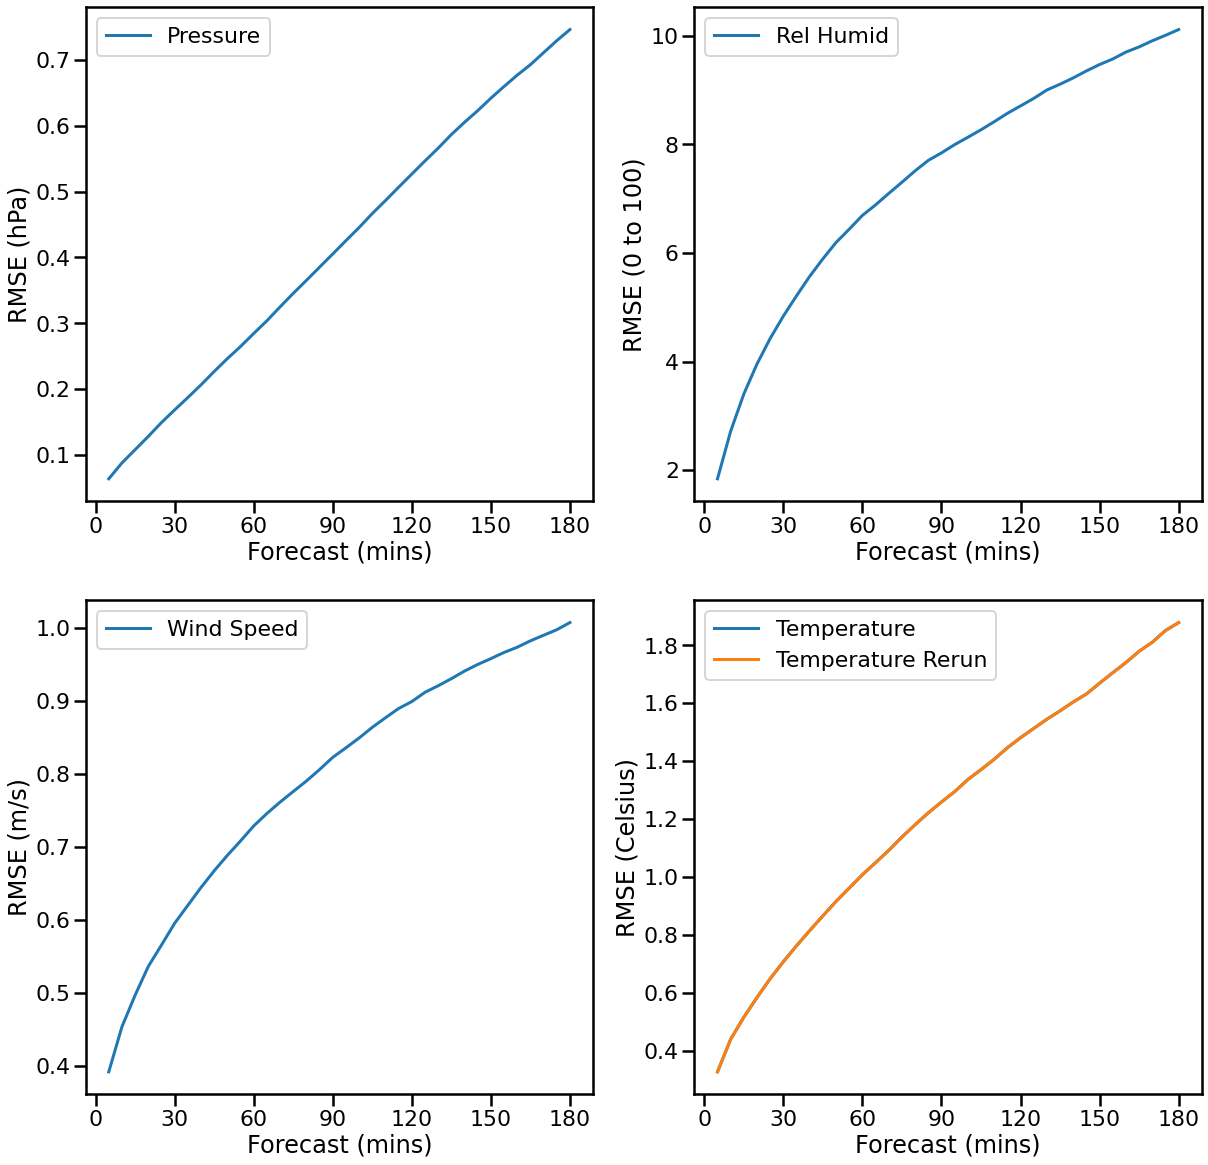

In [5]:
matplotlib.rcParams.update({'font.size': 24})

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

ax[0,0].plot(df_ps.index, df_ps.RMSE, label='Pressure')
ax[0,0].set_ylabel('RMSE (hPa)')
ax[0,0].set_xlabel('Forecast (mins)')
ax[0,0].set_xticks(range(0, 210, 30))
ax[0,0].legend()

ax[0,1].plot(df_rh.index, df_rh.RMSE, label='Rel Humid')
ax[0,1].set_ylabel('RMSE (0 to 100)')
ax[0,1].set_xlabel('Forecast (mins)')
ax[0,1].set_xticks(range(0, 210, 30))
ax[0,1].legend()

ax[1,0].plot(df_ws.index, df_ws.RMSE, label='Wind Speed')
ax[1,0].set_ylabel('RMSE (m/s)')
ax[1,0].set_xlabel('Forecast (mins)')
ax[1,0].set_xticks(range(0, 210, 30))
ax[1,0].legend()

ax[1,1].plot(df_te.index, df_te.RMSE, label='Temperature')
ax[1,1].plot(df_te_rerun.index, df_te_rerun.RMSE, label='Temperature Rerun')

ax[1,1].set_ylabel('RMSE (Celsius)')
ax[1,1].set_xlabel('Forecast (mins)')
ax[1,1].set_xticks(range(0, 210, 30))
ax[1,1].legend()

plt.savefig('weather_metrics_RMSE.png')